In [3]:
pip install numpy pandas matplotlib tensorflow yfinance


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

In [12]:
stock_symbol = 'AAPL'
start_date = '2010-01-01'
end_date = '2020-12-31'

In [13]:
stock_data = yf.download(stock_symbol, start=start_date, end=end_date)

[*********************100%***********************]  1 of 1 completed


In [14]:
data = stock_data[['Close']].values

In [15]:
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)


In [16]:
time_steps = 60  

X, y = [], []

In [17]:
for i in range(time_steps, len(data_scaled)):
    X.append(data_scaled[i - time_steps:i])
    y.append(data_scaled[i])

X, y = np.array(X), np.array(y)


In [18]:
split_ratio = 0.8
split_index = int(split_ratio * len(X))

X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

In [19]:
model = Sequential([
    LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.2),
    LSTM(units=50, return_sequences=True),
    Dropout(0.2),
    LSTM(units=50),
    Dropout(0.2),
    Dense(units=1)
])

model.compile(optimizer='adam', loss='mean_squared_error')


In [21]:
model.fit(X_train, y_train, epochs=50, batch_size=32)

Epoch 1/50
68/68 [==============================] - 8s 124ms/step - loss: 1.0217e-04
Epoch 2/50
68/68 [==============================] - 8s 120ms/step - loss: 1.0096e-04
Epoch 3/50
68/68 [==============================] - 8s 121ms/step - loss: 1.0560e-04
Epoch 4/50
68/68 [==============================] - 8s 124ms/step - loss: 8.9215e-05
Epoch 5/50
68/68 [==============================] - 8s 119ms/step - loss: 9.0732e-05
Epoch 6/50
68/68 [==============================] - 8s 116ms/step - loss: 1.1630e-04
Epoch 7/50
68/68 [==============================] - 8s 112ms/step - loss: 9.3985e-05
Epoch 8/50
68/68 [==============================] - 8s 114ms/step - loss: 9.3817e-05
Epoch 9/50
68/68 [==============================] - 8s 116ms/step - loss: 1.0770e-04
Epoch 10/50
68/68 [==============================] - 7s 105ms/step - loss: 9.6436e-05
Epoch 11/50
68/68 [==============================] - 7s 99ms/step - loss: 8.9178e-05
Epoch 12/50
68/68 [==============================] - 7s 103ms/st

In [22]:
predicted_prices = model.predict(X_test)
predicted_prices = scaler.inverse_transform(predicted_prices)

17/17 [==============================] - 3s 45ms/step


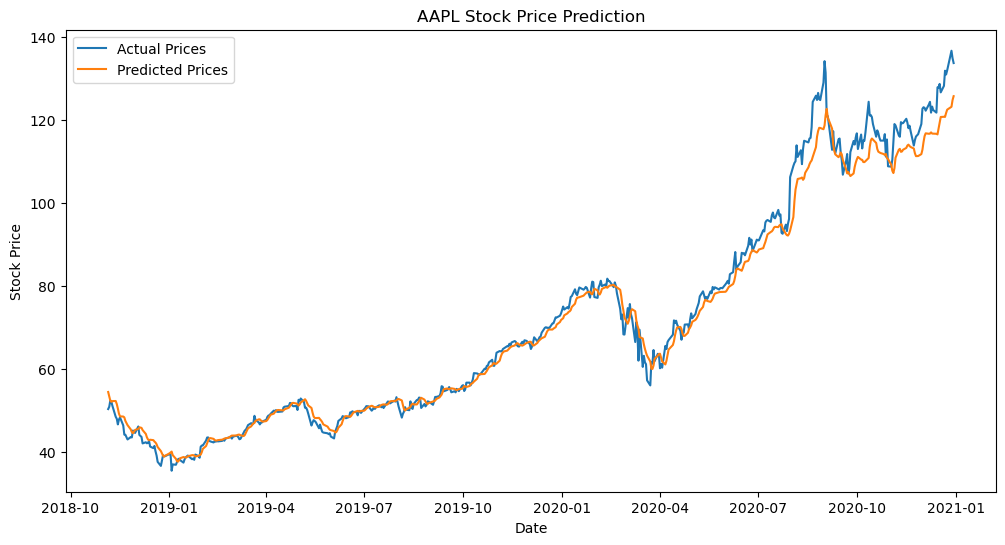

In [23]:
plt.figure(figsize=(12, 6))
plt.plot(stock_data.index[-len(y_test):], data[-len(y_test):], label='Actual Prices')
plt.plot(stock_data.index[-len(y_test):], predicted_prices, label='Predicted Prices')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title(f'{stock_symbol} Stock Price Prediction')
plt.legend()
plt.show()